# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [125]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [126]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?id=524901&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
   

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
    

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | aliwal north
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | ciudad lazaro cardenas
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | yagry
City not found. Skipping...
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | el granada
Processing Record 14 of Set 1 | castillos
Processing Record 15 of Set 1 | tobi village
City not found. Skipping...
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of

KeyboardInterrupt: 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,langepas,61.2544,75.2124,13.32,61,100,4.93,RU,1723087910
1,kavieng,-2.5744,150.7967,29.02,72,14,4.89,PG,1723087911
2,jiangkou,25.4872,119.1986,32.42,64,68,4.30,CN,1723087912
3,port-aux-francais,-49.3500,70.2167,0.41,94,100,11.61,TF,1723087913
4,puerto natales,-51.7236,-72.4875,0.58,81,100,1.64,CL,1723087914


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

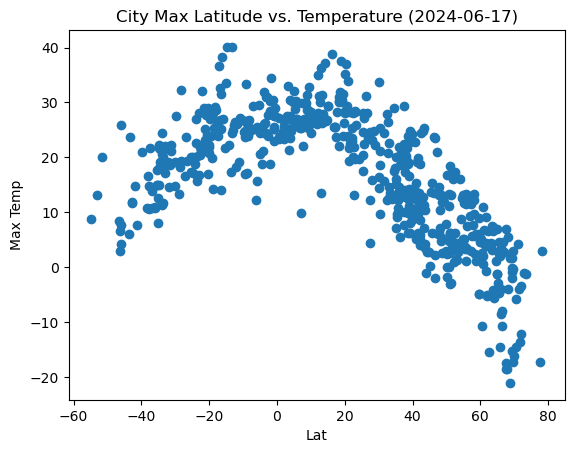

In [ ]:
# Build scatter plot for latitude vs. temperature                  #Alt. code
x_values = city_data_df['Lat']                                     #plt.scatter(lats, temps,edgecolor='black', linewidths=1, marker='o', alpha=0.5)     
y_values = city_data_df['Max Temp']                                #plt.title('City Max Latitude vs. Temperature (2024-06-17)')
# Incorporate the other graph properties                     
plt.scatter(x_values, y_values)                                    #plt.xlabel('Lat')                                                                        #
plt.title('City Max Latitude vs. Temperature (2024-06-17)')        #plt.ylabel('Max Temp')
plt.xlabel('Lat')                                                  #plt.savefig("output_data/Fig1.png")
plt.ylabel('Max Temp')                                             #plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")       

# Show plot
plt.show()

#### Latitude Vs. Humidity

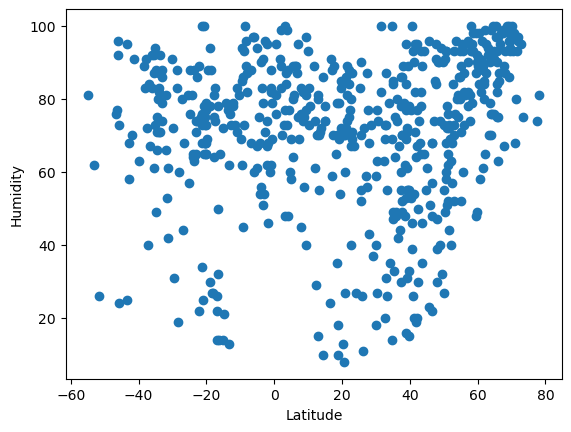

In [ ]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

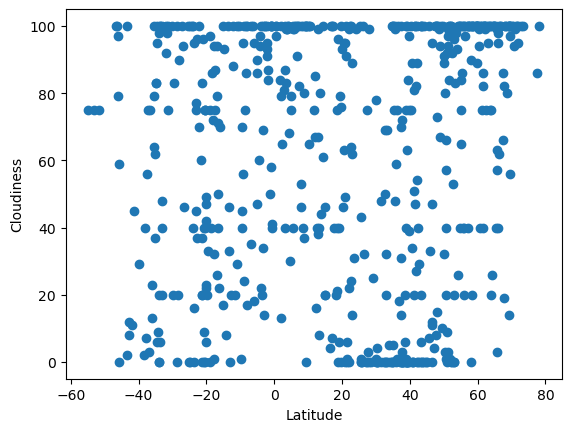

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

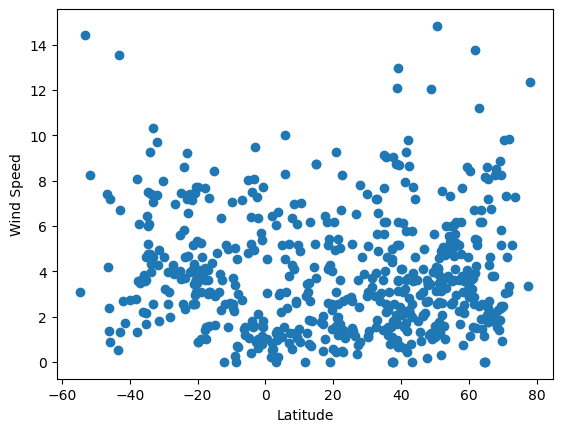

In [ ]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
#Correlation Coefficient Equation (Calculate) to find the relationship between lat and the y_values
corr = st.pearsonr(x_values, y_values)
print(f"""The correlation between max temp and lat is {round(corr[0],2)}.""")

The correlation between max temp and lat is -0.61.


In [ ]:
# Define a function to create Linear Regression plots
#x and y variables for the scatterplot's x and y axises
def lin_reg(x_values, y_values, title,lat, lng):

    #Calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values, edgecolor= "black", linewidths=1, marker="o",alph=0.5)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,lat,lng,fontsize=15,color='black')
    plt.xlabel('Lat')
    plt.ylabel(title)
    print(f"The rvalue is:{rvalue**2}")
    plt.show()
    

In [ ]:
#Print caluculations of the line regression: y = mx + b
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

print(line_eq)

slope:-0.20603354530304602
intercept:20.27694090604878
rvalue (Correlation coefficient):-0.6061548030379731
pandas (Correlation coefficient):PearsonRResult(statistic=-0.6061548030379732, pvalue=3.614279688569284e-59)
stderr:0.011273971684081426
y = -0.21x + 20.28


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
#Linear regression on northern hemisphere latitude and temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for hemisphere latitude and temperature
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      24.281242
1       3.915089
3      12.119977
4      15.218056
6      11.861949
         ...    
569    28.599299
570     0.059800
572     2.239729
573     5.390018
574    27.521542
Name: Lat, Length: 394, dtype: float64


In [ ]:
#Create line equation string for northern hemisphere lat vs max temp
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.7161472181434118


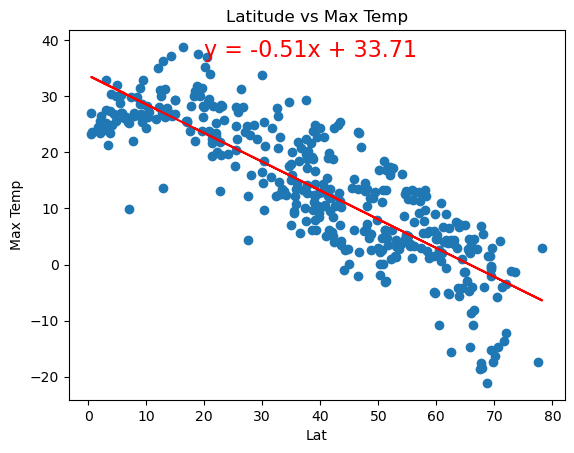

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

In [ ]:
#Linear regression on southern hemisphere latitude and temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for southern hemisphere latitude and temperature
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
2      14.718018
5      10.762825
7      20.614540
9      21.775486
10     21.282395
         ...    
563    20.972822
566    24.772473
571    16.972276
575    22.143609
576    22.139495
Name: Lat, Length: 183, dtype: float64


In [ ]:
#Create line equation string for southern hemisphere lat vs max temp
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.41210571686072434


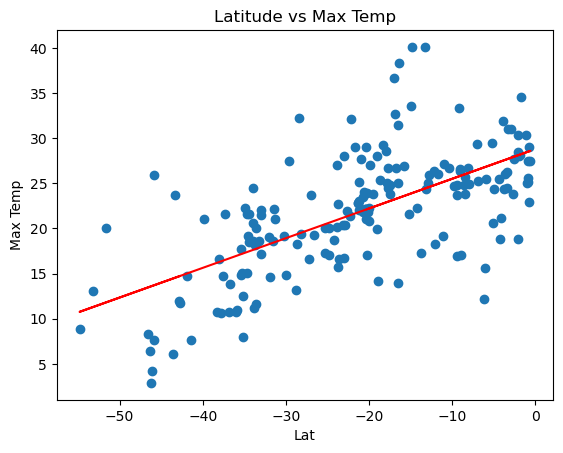

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** r^2 value of 0.3940754297489331 means a moderate relationship between the variables. r^2 (r**2) value of  0.7161472181434118 means moderate to strong linear relationship between latitude and max temp. And that 71.61% of the variability is captured by the moderate. This further suggests that the model is reliable.


### Humidity vs. Latitude Linear Regression Plot

In [ ]:
#Linear regression on northern hemisphere latitude and humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for hemisphere latitude and humidity
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      66.008517
1      76.229220
3      72.111618
4      70.556854
6      72.241108
         ...    
569    63.841510
570    78.163988
572    77.069996
573    75.489031
574    64.382380
Name: Lat, Length: 394, dtype: float64


In [ ]:
#Create line equation string for northern hemisphere lat vs humidity
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.05689741545789602


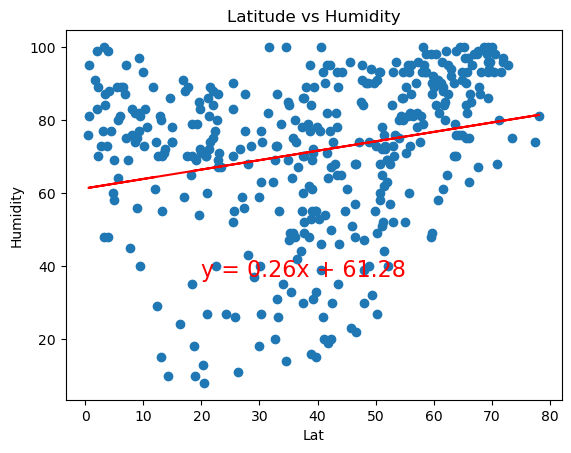

In [ ]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

In [ ]:
#Linear regression on southern hemisphere latitude and humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for southern hemisphere latitude and humidity
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
2      69.627856
5      69.319497
7      70.087565
9      70.178076
10     70.139633
         ...    
563    70.115498
566    70.411730
571    69.803604
575    70.206776
576    70.206455
Name: Lat, Length: 183, dtype: float64


In [ ]:
#Create line equation string for southern hemisphere lat vs humidity
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.0002808747046324612


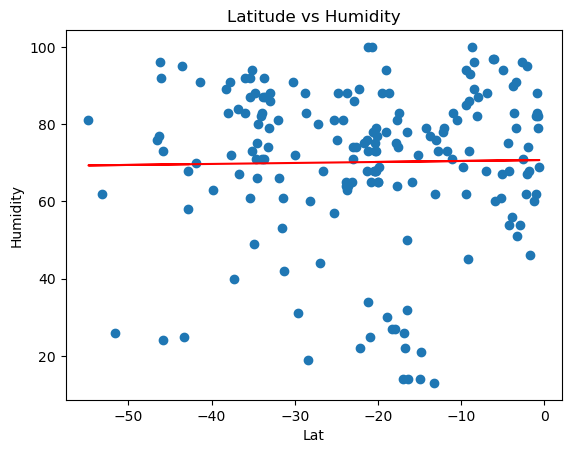

In [ ]:
# Southern Hemisphere for  lat vs humidity
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** r^2 value of 0.007659599322853922 or 0.00014367159540169783 means a weak relationship between the variables. The independent variable cannot explain the variability of the dependent variable. Similiarly, 0.0002808747046324612 is a weak relationship. r^2 (r**2) value of  0.05689741545789602 means moderate to strong linear relationship between latitude and max temp. And that 71.61% of the variability is captured by the moderate. This further suggests that the model is reliable.


### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
#Linear regression on northern hemisphere latitude and cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for northern hemisphere latitude and cloudiness
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      54.188325
1      66.484853
3      61.530965
4      59.660430
6      61.686756
         ...    
569    51.581200
570    68.812571
572    67.496390
573    65.594331
574    52.231921
Name: Lat, Length: 394, dtype: float64


In [ ]:
#Create line equation string for northern hemisphere lat vs cloudiness
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.024026517125811025


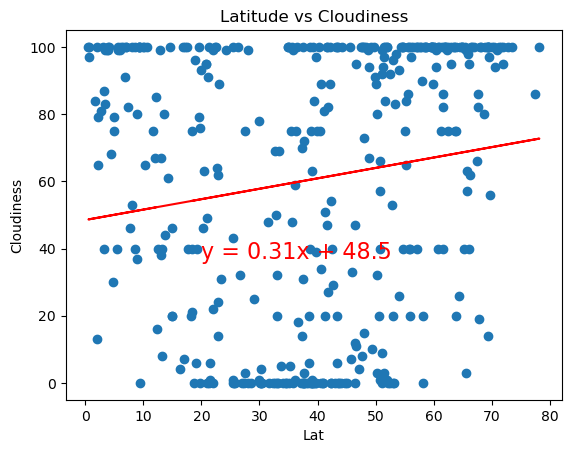

In [ ]:
#Northern hemisphere latitude and cloudiness
#Linear regression on Northernn Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

In [ ]:
##Linear regression on southern hemisphere latitude and cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for southern hemisphere latitude and cloudiness
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
2      50.311555
5      45.617714
7      57.309274
9      58.687031
10     58.101854
         ...    
563    57.734467
566    62.243717
571    52.986803
575    59.123903
576    59.119020
Name: Lat, Length: 183, dtype: float64


In [ ]:
#Create line equation string for southern hemisphere lat vs cloudiness
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.020567354299943663


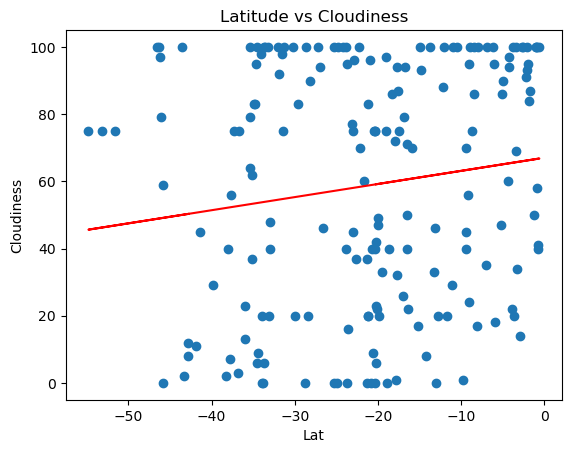

In [ ]:
## Southern Hemisphere for  lat vs cloudiness
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.006456908379763574


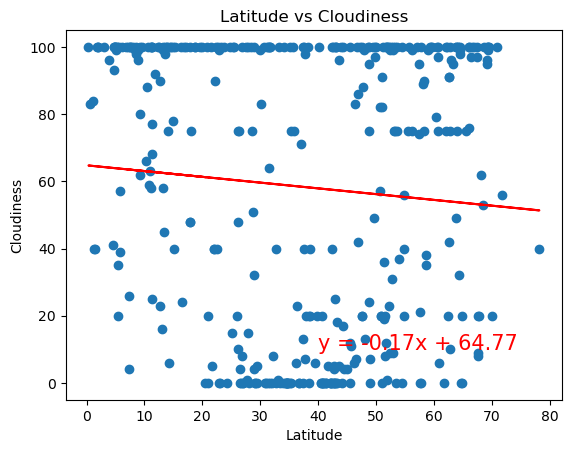

In [ ]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

In [121]:
# Southern Hemisphere
##Linear regression on southern hemisphere latitude and cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for southern hemisphere latitude and cloudiness
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
2      50.311555
5      45.617714
7      57.309274
9      58.687031
10     58.101854
         ...    
563    57.734467
566    62.243717
571    52.986803
575    59.123903
576    59.119020
Name: Lat, Length: 183, dtype: float64


In [ ]:
#Create line equation string for southern hemisphere lat vs cloudiness
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.020567354299943663


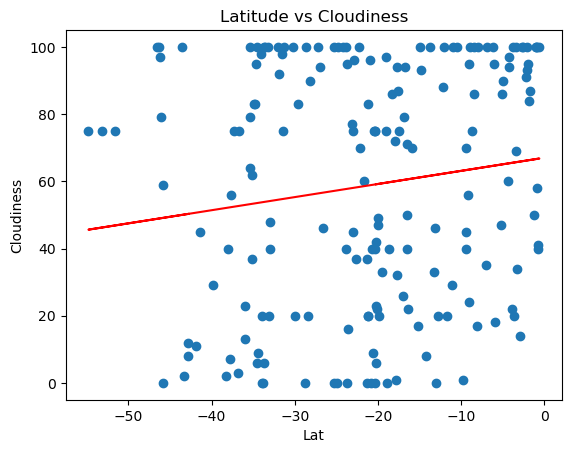

In [127]:
## Southern Hemisphere for  lat vs cloudiness
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** r^2 is between 0 to 0.4... are weak relationships to moderate relationships. While a r^2 from 0.5 to 0.9 are moderate to strong relationships. One is considered the "perfect relationship/r^2" because it represents the strongest relationship.

### Wind Speed vs. Latitude Linear Regression Plot

In [131]:
# Northern Hemisphere
##Linear regression on northern hemisphere latitude and cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for northern hemisphere latitude and cloudiness
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      3.222719
1      4.130585
3      3.764834
4      3.626730
6      3.776336
         ...   
569    3.030232
570    4.302443
572    4.205268
573    4.064837
574    3.078275
Name: Lat, Length: 394, dtype: float64


In [132]:
#Create line equation string for southern hemisphere lat vs cloudiness
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.030396762354449457


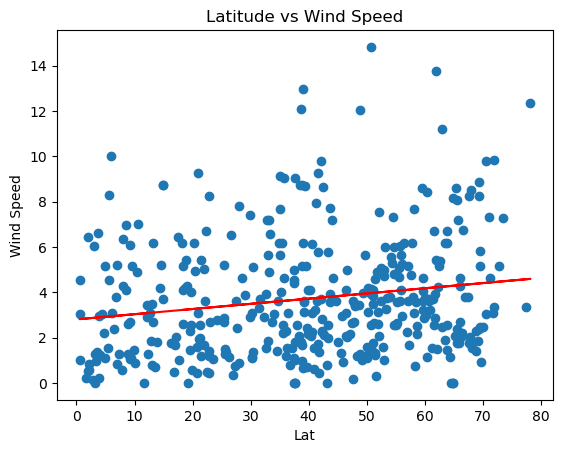

In [133]:
##Northern Hemisphere for  lat vs wind speed
# Linear regression on Northern Hemisphere for lat vs wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

In [137]:
#Southern Hemisphere
##Linear regression on southern hemisphere latitude and wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values for southern hemisphere latitude and wind speed
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
2      5.227478
5      5.813431
7      4.353921
9      4.181930
10     4.254980
         ...   
563    4.300842
566    3.737933
571    4.893515
575    4.127393
576    4.128002
Name: Lat, Length: 183, dtype: float64


In [138]:
#Create line equation string for southern hemisphere lat vs cloudiness
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r^2 value is: 0.062239040700515724


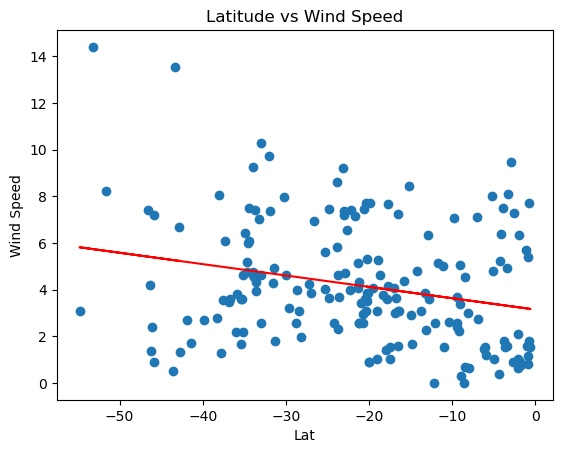

In [139]:
# Southern Hemisphere
# Southern Hemisphere for  lat vs wind speed
# Linear regression on Northern Hemisphere for lat vs wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

#y = mx + b
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate lin. regress.
plt.annotate(line_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** r^2 is between 0 to 0.4... are weak relationships to moderate relationships. While a r^2 from 0.5 to 0.9 are moderate to strong relationships. One is considered the "perfect relationship/r^2" because it represents the strongest relationship. Weak relationships cannot explain the variablity of the dependent variable. While strong relationships can explain the variability.